<a href="https://colab.research.google.com/github/KarissaChan1/rocket-nuggets/blob/main/MLP_Parameter_Updates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an example of gradient descent/parameter updates done manually.

In [ ]:
import numpy as np

In [ ]:
#######################   Parabolic clusters   ###########################
#####################  Synthetic Data Creation   #########################

nData=2000    # number of points in each cluster
nTrain=1000   # number of training points
nEpoch=5      # number of training iterations
nTest=2000    # number of test points
alpha=0.001   # step size (learning rate)

std=0.5                       # standard deviation of the distance of points
x=np.zeros((2*nData,2))      # pre-allocate for the input and the
t=np.zeros((2*nData))        # target vector.                           
r=np.random.normal(0,std,2*nData);
the=2*np.pi*np.random.rand(2*nData); 
w11f=np.zeros(nEpoch*nTrain)
w12f=np.zeros(nEpoch*nTrain)


h=-6+12*np.random.rand(nData)
v=5+(h**2)/6
x[0:nData,0]=h + r[0:nData]*np.cos(the[0:nData])
x[0:nData,1]=v + r[0:nData]*np.sin(the[0:nData])
t[0:nData]=0

h=-5+10*np.random.rand(nData)
v=10+(h**2)/4
x[nData:2*nData,0]=h + r[nData:2*nData]*np.cos(the[nData:2*nData])
x[nData:2*nData,1]=v + r[nData:2*nData]*np.sin(the[nData:2*nData])
t[nData:2*nData]=1

#######################  Normalization   ################################
x[:,0]=1 + 0.1*x[:,0]
x[:,1]=1 + 0.1*x[:,1]


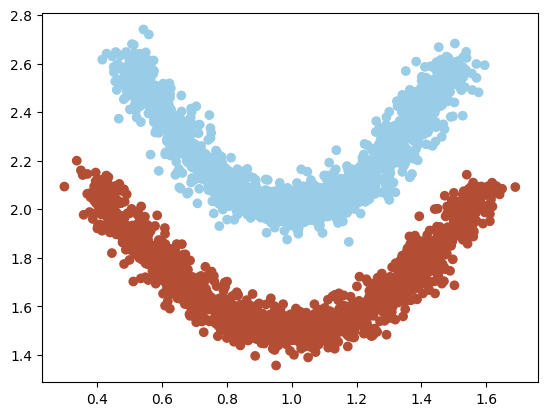

In [ ]:
import matplotlib.pyplot as plt
color1=(0.7, 0.3, 0.2, 1.0)
color2=(0.6, 0.8, 0.9, 1.0)
colormap = np.array([color1,color2])
plt.figure()
plt.scatter(x[:,0],x[:,1],c=colormap[t.astype(int)])

We are training a network with two inputs (x[:0] and x[:1]), 4 neurons in the hidden layer, and one output neuron for binary classification.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


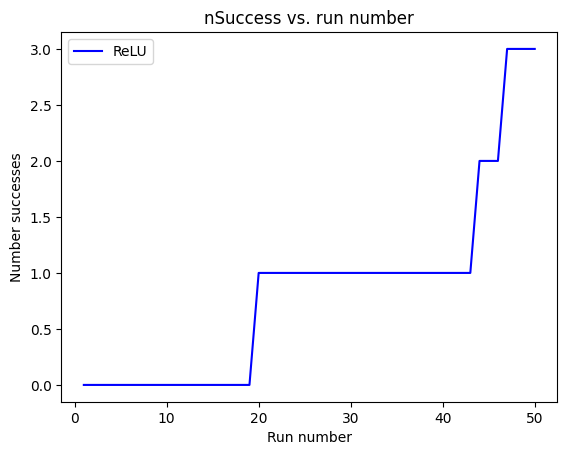

In [ ]:
import random
nSuccess = 0
nIter = 50
success_array = np.zeros([nIter,1])
for k in range(0,nIter): # number of times we want to run (test) the model

################# Parameter Intialization    ############################
    w11=0.5-np.random.rand(); w12=0.5-np.random.rand()  # weights for 4 neurons
    w21=0.5-np.random.rand(); w22=0.5-np.random.rand()
    w31=0.5-np.random.rand(); w32=0.5-np.random.rand()
    w41=0.5-np.random.rand(); w42=0.5-np.random.rand()
    
    b2=0.5-np.random.rand(); b1=0.5-np.random.rand()    # biases for 4 neurons
    b3=0.5-np.random.rand(); b4=0.5-np.random.rand()
    
    ww1=0.5-np.random.rand(); ww2=0.5-np.random.rand()  # parameters of output layer
    ww3=0.5-np.random.rand(); ww4=0.5-np.random.rand()
    bb=0.5-np.random.rand()
    
    a=range(0,2*nData)
    sp=random.sample(a,nTrain+nTest) # indexes for random selection of data fo
                                     #  training and testing
    
    ########################### Training #####################################
    p=0
    for epoch in range(0,nEpoch):   # number of iterations for training  
        for i in range(0,nTrain):   # indexing only training data

            y1 = b1 + w11*x[sp[i],0] + w12*x[sp[i],1]           # computing outputs in layer 1 (forward pass)
            y2 = b2 + w21*x[sp[i],0] + w22*x[sp[i],1]
            y3 = b3 + w31*x[sp[i],0] + w32*x[sp[i],1]
            y4 = b4 + w41*x[sp[i],0] + w42*x[sp[i],1]
            
            
            dxx1=y1>0; xx1=y1*dxx1;  dxx2=y2>0; xx2=y2*dxx2     #  computing hidden layer outputs using ReLU activation 
            dxx3=y3>0; xx3=y3*dxx3; dxx4=y4>0; xx4=y4*dxx4
            
            yy = bb + ww1*xx1 + ww2*xx2 + ww3*xx3 + ww4*xx4     # computing output yy (forward pass)
            yy=yy>0                                             # setting yy as either class (0 or 1)
            e = t[sp[i]] - yy  # computing error 
            
            ww1=ww1 + alpha*e*xx1; ww2=ww2 + alpha*e*xx2        # updating output parameters (backprop)
            ww3=ww3 + alpha*e*xx3; ww4=ww4 + alpha*e*xx4
            
            bb=bb + alpha*e    
            
            w11=w11 + alpha*e*ww1*dxx1*x[sp[i],0]               # updating hidden layer parameters (backprop)
            w12=w12 + alpha*e*ww1*dxx1*x[sp[i],1]               
            w21=w21 + alpha*e*ww2*dxx2*x[sp[i],0]
            w22=w22 + alpha*e*ww2*dxx2*x[sp[i],1]   
            w31=w31 + alpha*e*ww3*dxx3*x[sp[i],0]
            w32=w32 + alpha*e*ww3*dxx3*x[sp[i],1]
            w41=w41 + alpha*e*ww4*dxx4*x[sp[i],0]
            w42=w42 + alpha*e*ww4*dxx4*x[sp[i],1]
                                
            b1=b1 + alpha*e*ww1*dxx1;  b2=b2 + alpha*e*ww2*dxx2
            b3=b3 + alpha*e*ww3*dxx3;  b4=b4 + alpha*e*ww4*dxx4
        
            w11f[p]=w11; w12f[p]=w12;       # this is not necessary; just to save weights per iteration so you can see how the weights change with training
            p=p+1
    
    ########################  Testing  ######################################
    er=0
    for i in range(nTrain,nTrain+nTest):    # we are separating train and test data by index (nTest = nTrain:end)
        y1 = b1 + w11*x[sp[i],0] + w12*x[sp[i],1]
        y2 = b2 + w21*x[sp[i],0] + w22*x[sp[i],1]
        y3 = b3 + w31*x[sp[i],0] + w32*x[sp[i],1]
        y4 = b4 + w41*x[sp[i],0] + w42*x[sp[i],1]
        
        dxx1=y1>0; xx1=y1*dxx1;  dxx2=y2>0; xx2=y2*dxx2     #  rect. activation  
        dxx3=y3>0; xx3=y3*dxx3;  dxx4=y4>0; xx4=y4*dxx4
        
        yy = bb + ww1*xx1 + ww2*xx2 + ww3*xx3 + ww4*xx4
        yy=yy>0
        e = abs(t[sp[i]] - yy)
        er=er+e        
    er=er/nTest        
    
    if er<0.05:
        nSuccess+=1
        
        
    success_array[k,0]=nSuccess
    print(k)

plt.plot(np.arange(1,nIter+1),success_array, color='b',label='ReLU')
plt.title('nSuccess vs. run number')
plt.xlabel('Run number')
plt.ylabel('Number successes')
plt.legend()


(5000,)


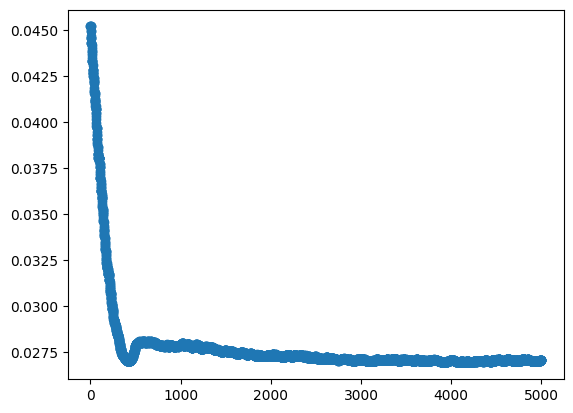

In [ ]:
plt.scatter(x=np.arange(len(w11f)),y=w11f)
print(np.shape(w11f))